Original dataset size: 5856
Duplicate found: C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\NORMAL\NORMAL2-IM-0587-0001-0002.jpeg == C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\NORMAL\NORMAL2-IM-0587-0001-0001.jpeg
Duplicate found: C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\PNEUMONIA\person1159_virus_1945.jpeg == C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\PNEUMONIA\person1159_virus_1944.jpeg
Duplicate found: C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\PNEUMONIA\person124_virus_247.jpeg == C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\PNEUMONIA\person124_virus_246.jpeg
Duplicate found: C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\PNEUMONIA\person1261_virus_2148.jpeg == C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\PNEUMONIA\person1261_virus_2147.jpeg
Duplicate found: C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray\train\PNEUMONIA\pers

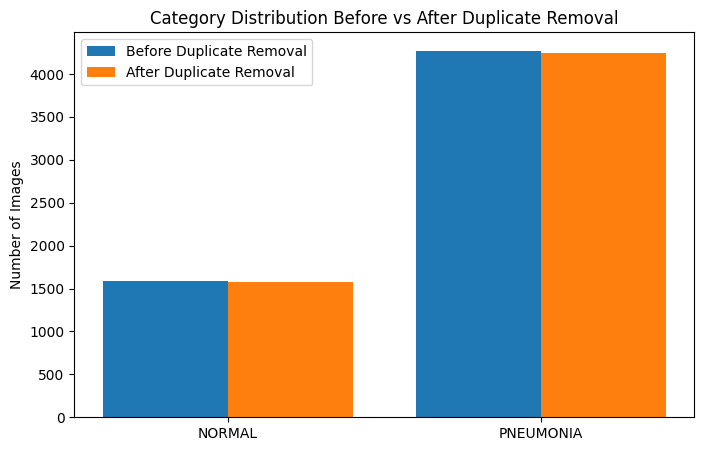

In [3]:
import os
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import hashlib


def load_full_dataset(base_path):
    all_images = []
    for dataset_type in ["train", "test", "val"]:
        dataset_path = os.path.join(base_path, dataset_type)
        if not os.path.exists(dataset_path):
            continue
        for label in os.listdir(dataset_path):
            label_path = os.path.join(dataset_path, label)
            if not os.path.isdir(label_path):
                continue
            for img_file in glob(os.path.join(label_path, "*")):
                try:
                    img = Image.open(img_file)
                    all_images.append((img, label.upper(), dataset_type.upper(), img_file))
                except Exception as e:
                    print(f"Error loading {img_file}: {e}")
    return all_images


def remove_duplicates_md5(dataset):
    seen_hashes = {}
    unique_dataset = []
    for img, label, dataset_type, path in dataset:
        img_bytes = np.array(img).tobytes()
        img_hash = hashlib.md5(img_bytes).hexdigest()
        if img_hash not in seen_hashes:
            seen_hashes[img_hash] = path
            unique_dataset.append((img, label, dataset_type, path))
        else:
            print(f"Duplicate found: {path} == {seen_hashes[img_hash]}")
    return unique_dataset


def plot_category_histograms(dataset_before, dataset_after):
    labels_before = [label for _, label, _, _ in dataset_before]
    counts_before = Counter(labels_before)
    labels_after = [label for _, label, _, _ in dataset_after]
    counts_after = Counter(labels_after)

    all_labels = sorted(set(counts_before.keys()) | set(counts_after.keys()))
    before_values = [counts_before.get(label, 0) for label in all_labels]
    after_values = [counts_after.get(label, 0) for label in all_labels]

    x = range(len(all_labels))
    plt.figure(figsize=(8,5))
    plt.bar(x, before_values, width=0.4, label="Before Duplicate Removal")
    plt.bar([i+0.4 for i in x], after_values, width=0.4, label="After Duplicate Removal")
    plt.xticks([i+0.2 for i in x], all_labels)
    plt.ylabel("Number of Images")
    plt.title("Category Distribution Before vs After Duplicate Removal")
    plt.legend()
    plt.show()


base_path = r"C:\Users\USER\pneumonia_xray_project\data\raw\chest_xray"
dataset = load_full_dataset(base_path)
print(f"Original dataset size: {len(dataset)}")

dataset_unique = remove_duplicates_md5(dataset)
print(f"After duplicate removal: {len(dataset_unique)}")

plot_category_histograms(dataset, dataset_unique)
